# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : Car Vs Bike Classification Dataset (https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset)

Problem Statement : Mengembangkan sebuah model klasifikasi menggunakan deep learning dan teknik computer vision untuk membedakan antara gambar mobil dan motor dalam dataset Car vs Bike Classification, dengan tujuan mencapai tingkat akurasi minimal 80% dalam waktu 1 minggu, yang relevan untuk mengoptimalkan pengenalan objek pada sistem otomatisasi untuk meningkatkan keamanan transportasi dan pengembangan teknologi otonom.

Objective: Menghasilkan model klasifikasi menggunakan deep learning dan teknik computer vision yang dapat membedakan antara gambar mobil dan motor dalam dataset Car vs Bike Classification, dengan mencapai tingkat akurasi minimal 80%

# ii. Import Library

In [1]:
# import library yang digunakan
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# iii. Load Model

In [2]:
# koneksi dengan google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
file_id = '1e6EU215mNXZ82_Zvow3gm309KdZgYnTN'  # ID file Google Drive
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model_improv.keras')  # Simpan file dengan nama 'model_improv.keras'

In [5]:
# Load the model
model = load_model('model_improv.keras')

Saya melakukan load model dengan google drive.

# iv. Prediksi Gambar dengan Model

In [6]:
# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

def predict_image(model, img_path, threshold=0.5):
    img, img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0][0] < threshold:
        predicted_class = 'Bike'
    else:
        predicted_class = 'Car'
    return img, predicted_class

Saya coba membuat fungsi untuk memproses dan menunjukkan gambar yang diinput dengan path google drive.

## iv.1 Prediksi Motor

1/1 [==============================] - 2s 2s/step


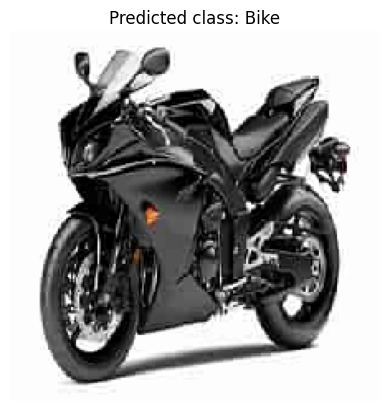

In [7]:
# Example usage
img_path = '/content/drive/MyDrive/Phase2/P2G7_nailina_farah/motor.jpeg'  # Path to the image to be predicted
img, prediction = predict_image(model, img_path)

# Display the image with predicted class
plt.imshow(img)
plt.title(f'Predicted class: {prediction}')
plt.axis('off')
plt.show()

Model dapat dengan baik memprediksi gambar motor.

## iv.2 Prediksi Mobil

1/1 [==============================] - 0s 27ms/step


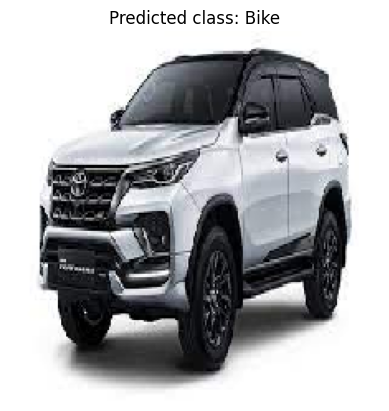

In [8]:
# Example usage
img_path = '/content/drive/MyDrive/Phase2/P2G7_nailina_farah/mobil.jpeg'  # Path to the image to be predicted
img, prediction = predict_image(model, img_path)

# Display the image with predicted class
plt.imshow(img)
plt.title(f'Predicted class: {prediction}')
plt.axis('off')
plt.show()

Model tidak dapat memprediksi gambar mobil dengan baik.

# v. Kesimpulan

Model ANN Computer Vision yang telah dibuat tidak dapat mengklasifikasi dengan baik antara motor dan mobil. Model tidak dapat mengenali gambar mobil, sehingga diperlukan improvisasi lebih lanjut agar model dapat mendeteksi dan membedakan antara motor dengan mobil.